# Survival in the Titanic Prediction  

#### Importing libraries 

In [1]:
import numpy as np 
import pandas as  pd 
import seaborn as sb 
import matplotlib.pyplot as plt 
import sklearn 
from pandas import Series, DataFrame
from pylab import rcParams 
from sklearn import preprocessing 
from sklearn. linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Loading the titanic dataset from url 

In [2]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Embarked'], axis = 1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
titanic.shape # 891 rows with 12 columns 

(891, 7)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


#### checking for null values 

In [7]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mode()[0])

In [9]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [10]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking for outliers using IQR method 

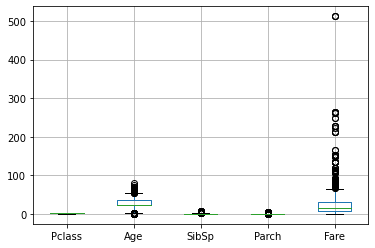

In [11]:
titanic.boxplot(column=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [12]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    
    return lower_range,upper_range

In [22]:
#lowerbound,upperbound = outlier_treatment(titanic.Fare)
lowerbound,upperbound = outlier_treatment(titanic.Parch)
lowerbound,upperbound = outlier_treatment(titanic.SibSp)
#lowerbound,upperbound = outlier_treatment(titanic.Age)

In [23]:
#titanic.drop(titanic[(titanic.Fare < lowerbound) | (titanic.Fare > upperbound)].index, inplace = True)
titanic.drop(titanic[(titanic.Parch < lowerbound) | (titanic.Parch > upperbound)].index, inplace = True)
titanic.drop(titanic[(titanic.SibSp < lowerbound) | (titanic.SibSp > upperbound)].index, inplace = True)
#titanic.drop(titanic[(titanic.Age < lowerbound) | (titanic.Age > upperbound)].index, inplace = True)

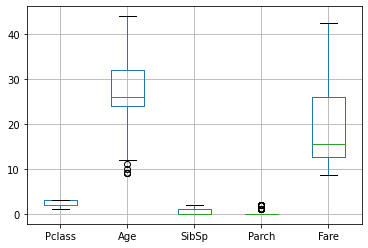

In [24]:
titanic.boxplot(column=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

#### EDA

In [25]:
titanic['Survived'].value_counts()   # 0 indicating people survived and 1 indicating people died 

0    181
1    114
Name: Survived, dtype: int64

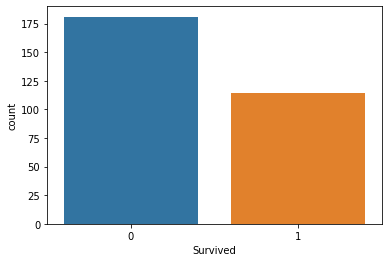

In [26]:
sb.countplot(titanic['Survived'])

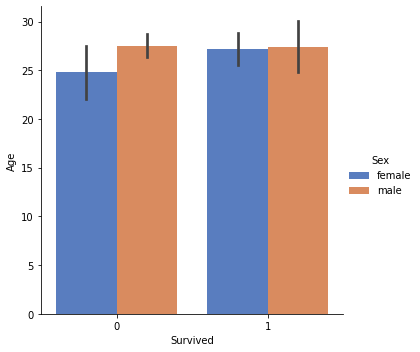

In [27]:
sb.catplot(x='Survived', y='Age', data=titanic, kind='bar',palette='muted', hue='Sex')

#### Creating training and testing dataset 

In [28]:
titanic['Sex'] = pd.get_dummies(titanic['Sex']).values

In [29]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
8,1,3,1,27.0,0,2,11.1333
9,1,2,1,14.0,1,0,30.0708
17,1,2,0,24.0,0,0,13.0000
18,0,3,1,31.0,1,0,18.0000
20,0,2,0,35.0,0,0,26.0000


In [30]:
X = titanic.iloc[:, 1:7].values
Y = titanic.iloc[:, 0].values
Y

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

#### Applying Logistic Regression 

In [34]:
X_train.shape, Y_train.shape

((238, 6), (238,))

In [35]:
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [36]:
Y_predict = classifier.predict(X_test)

In [38]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        54
           1       0.65      0.58      0.61        26

    accuracy                           0.76        80
   macro avg       0.73      0.71      0.72        80
weighted avg       0.76      0.76      0.76        80



In [39]:
confusion_matrix(Y_test, Y_predict)

array([[46,  8],
       [11, 15]], dtype=int64)

In [41]:
print("Accuracy-score of Logistic regression =", accuracy_score(Y_test, Y_predict)*100, "%")

Accuracy-score of Logistic regression = 76.25 %


#### Applying Decission Tree 

In [32]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [33]:
Y_predict = classifier.predict(X_test)

In [34]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        46
           1       0.59      0.61      0.60        28

    accuracy                           0.69        74
   macro avg       0.67      0.67      0.67        74
weighted avg       0.69      0.69      0.69        74



In [35]:
confusion_matrix(Y_test, Y_predict)

array([[34, 12],
       [11, 17]], dtype=int64)

In [36]:
print("Accuracy-score of Decission Tree =", accuracy_score(Y_test, Y_predict)*100, "%")

Accuracy-score of Decission Tree = 68.91891891891892 %


#### Hypertuning the parameters using Grid Search 

In [37]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [38]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=classifier, param_grid=grid_param, cv=5, n_jobs =-1)

In [39]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [40]:
best_parameters=grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}


0.8595959595959597

#### Applying Decission Tree after Hypertuning the parameters 

In [41]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 11, min_samples_leaf = 1, splitter = 'random')
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, splitter='random')

In [42]:
Y_predict = classifier.predict(X_test)

In [43]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        46
           1       0.72      0.64      0.68        28

    accuracy                           0.77        74
   macro avg       0.76      0.75      0.75        74
weighted avg       0.77      0.77      0.77        74



In [44]:
confusion_matrix(Y_test, Y_predict)

array([[39,  7],
       [10, 18]], dtype=int64)

In [45]:
print("Accuracy-score of Decission Tree =", accuracy_score(Y_test, Y_predict)*100, "%")

Accuracy-score of Decission Tree = 77.02702702702703 %


#### Saving a Model 

In [46]:
import pickle 

filename = 'model3.pkl'
pickle.dump(classifier, open(filename, 'wb'))